In [1]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.11.0


In [2]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

'C:\\Users\\procns\\.keras\\datasets\\auto-mpg.data'

In [3]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [4]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [5]:
dataset = dataset.dropna()

In [6]:
X_data = dataset.drop('MPG', axis = 1)
y_data = dataset['MPG']

In [8]:
X_train, X_test, y_train, y_test  = train_test_split(X_data, y_data, test_size = 0.2)

In [9]:
print("X_train.shape :", X_train.shape)

print("y_train.shape :", y_train.shape)

print("X_test.shape:", X_test.shape)

print("y_test.shape:", y_test.shape)

X_train.shape : (313, 7)
y_train.shape : (313,)
X_test.shape: (79, 7)
y_test.shape: (79,)


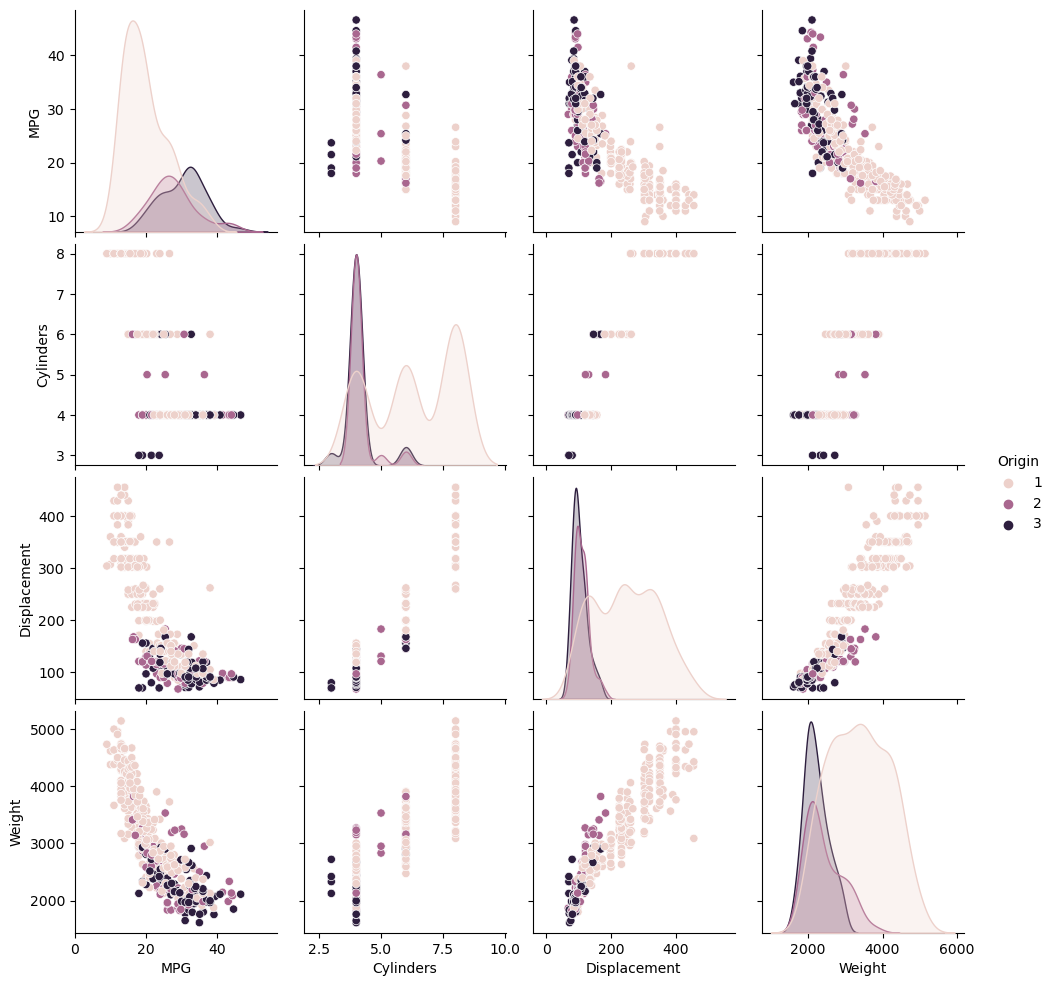

In [10]:
sns.pairplot(dataset, vars = ["MPG", "Cylinders", "Displacement", "Weight"], diag_kind="kde", hue = 'Origin')
plt.show()

In [12]:
train_stats = X_train.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,313.0,5.507987,1.704284,3.0,4.0,4.0,8.0,8.0
Displacement,313.0,196.755591,104.798472,70.0,105.0,151.0,302.0,455.0
Horsepower,313.0,105.731629,38.761080,46.0,77.0,95.0,130.0,230.0
Weight,313.0,2983.083067,840.939523,1613.0,2234.0,2815.0,3613.0,5140.0
Acceleration,313.0,15.371885,2.754747,8.0,13.5,15.3,17.0,24.6
Model Year,313.0,75.843450,3.690480,70.0,73.0,76.0,79.0,82.0
Origin,313.0,1.562300,0.794684,1.0,1.0,1.0,2.0,3.0


In [13]:
df_corr = dataset.corr()

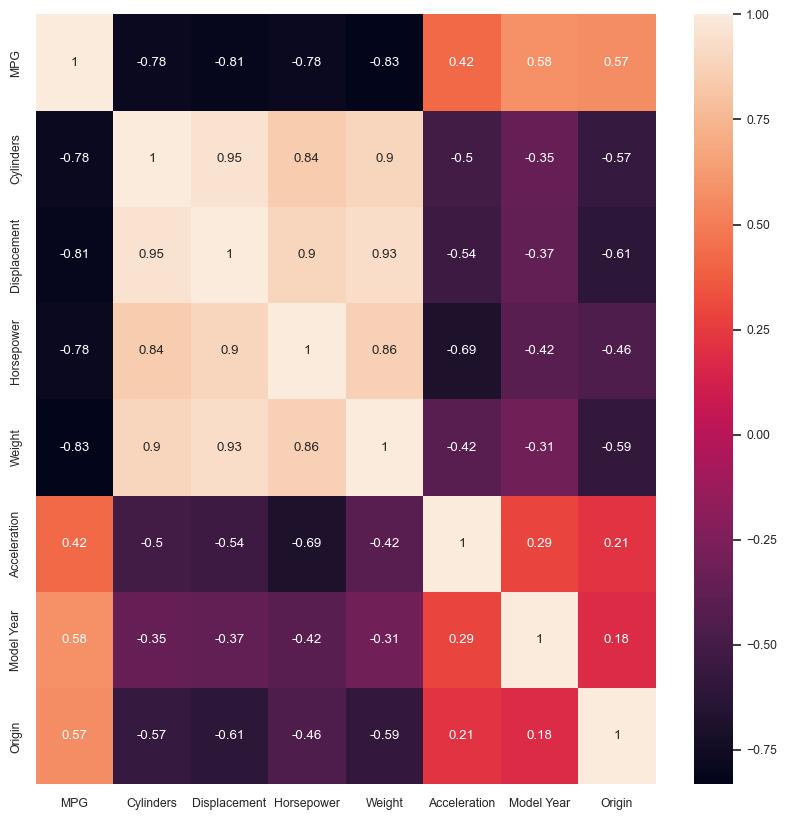

In [14]:
plt.figure(figsize = (10,10))
sns.set(font_scale = 0.8)
sns.heatmap(df_corr, annot = True, cbar = True)
plt.show()

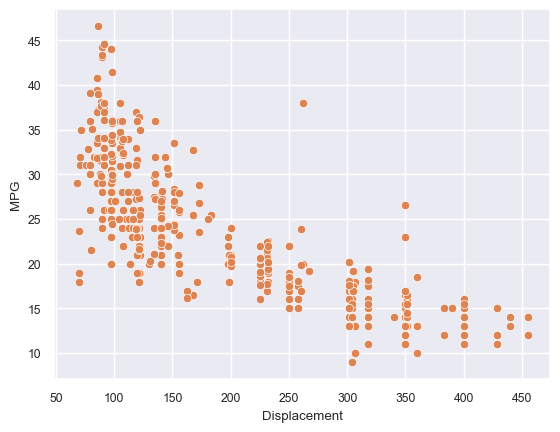

In [17]:
sns.scatterplot(x='Displacement', y = 'MPG', data = dataset)
plt.show()

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score

In [19]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
train_scaled = ss.transform(X_train)
test_scaled = ss.transform(X_test)

In [22]:
print ("==================================")
print (" ACCURACY OF OTHER ML REGRESSION" )
print ("==================================")

 ACCURACY OF OTHER ML REGRESSION


In [53]:
from sklearn.linear_model import LinearRegression
import numpy as np

print('----------LinearRegression----------')
lr = LinearRegression()
lr.fit(train_scaled, y_train)

lr_preds = lr.predict(test_scaled)
mse = np.sqrt(mean_squared_error(lr_preds, y_test))
print('평균제곱근오차', mse)
rmse = np.sqrt(mse)
print(f'MSE : {mse:.3f}, RMSE: {rmse:.3f}')
print(f'Variance score : {r2_score(y_test, lr_preds):.3f}')

----------LinearRegression----------
평균제곱근오차 2.6692189966435134
MSE : 2.669, RMSE: 1.634
Variance score : 0.868


<Figure size 640x480 with 0 Axes>

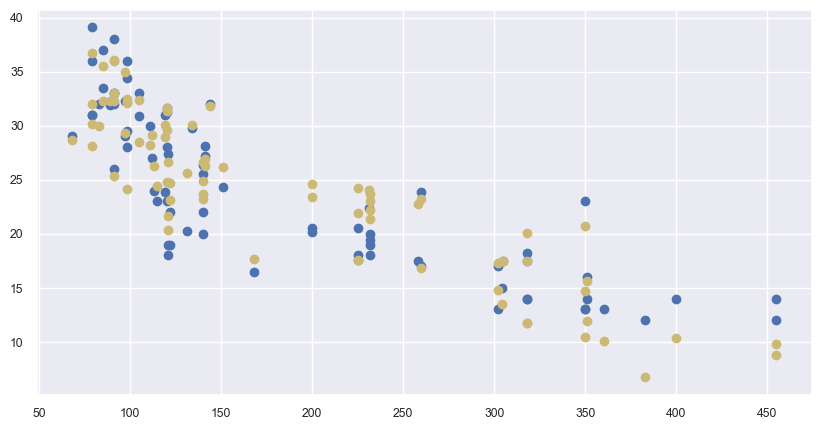

In [44]:
plt.clf()
plt.figure(figsize=(10,5))
plt.scatter(X_test['Displacement'], y_test, label='y_test')
plt.scatter(X_test['Displacement'], lr_preds, c='y', label='lr_preds')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()        

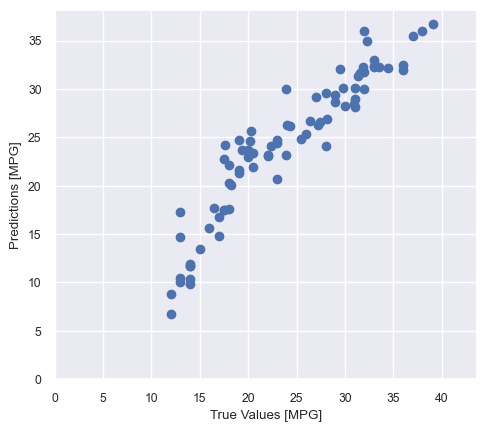

In [64]:
plt.scatter(y_test, lr_preds)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
plt.show()

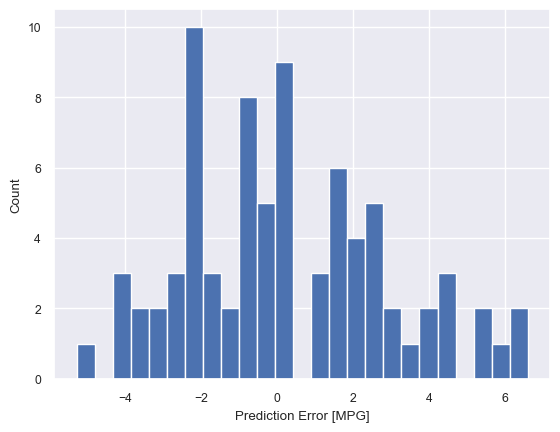

In [69]:
error = lr_preds - y_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
plt.ylabel("Count")
plt.show()

In [54]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(train_scaled, y_train)

print('----------DecisionTreeRegressor----------')
dy_preds = model.predict(test_scaled)

mse = np.sqrt(mean_squared_error(dy_preds, y_test))
print('평균제곱근오차', mse)
rmse = np.sqrt(mse)
print(f'MSE : {mse:.3f}, RMSE: {rmse:.3f}')
print(f'Variance score : {r2_score(y_test, lr_preds):.3f}')

----------DecisionTreeRegressor----------
평균제곱근오차 3.252029551300487
MSE : 3.252, RMSE: 1.803
Variance score : 0.868


<Figure size 640x480 with 0 Axes>

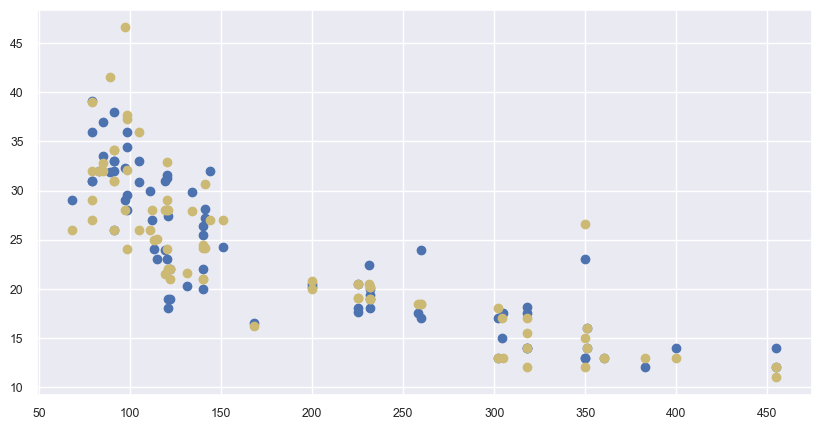

In [45]:
plt.clf()
plt.figure(figsize=(10,5))
plt.scatter(X_test['Displacement'], y_test, label='y_test')
plt.scatter(X_test['Displacement'], dy_preds, c='y', label='lr_preds')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()        

In [55]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(train_scaled, y_train)

print('----------RandomForestRegressor----------')

ry_preds = model.predict(test_scaled)
mse = np.sqrt(mean_squared_error(ry_preds, y_test))
print('평균제곱근오차', mse)
print(f'MSE : {mse:.3f}, RMSE: {rmse:.3f}')
print(f'Variance score : {r2_score(y_test, lr_preds):.3f}')

----------RandomForestRegressor----------
평균제곱근오차 2.3913469113938484
MSE : 2.391, RMSE: 1.803
Variance score : 0.868


<Figure size 640x480 with 0 Axes>

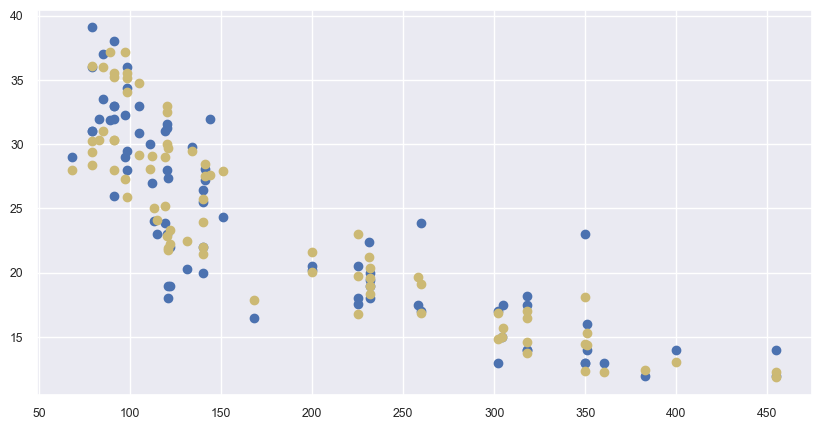

In [49]:
plt.clf()
plt.figure(figsize=(10,5))
plt.scatter(X_test['Displacement'], y_test, label='y_test')
plt.scatter(X_test['Displacement'], ry_preds, c='y', label='lr_preds')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()        

In [56]:
from sklearn import svm

model.fit(train_scaled, y_train)

print('----------svm----------')

sy_preds = model.predict(test_scaled)
mse = np.sqrt(mean_squared_error(sy_preds, y_test))
print('평균제곱근오차', mse)
print(f'MSE : {mse:.3f}, RMSE: {rmse:.3f}')
print(f'Variance score : {r2_score(y_test, lr_preds):.3f}')

----------svm----------
평균제곱근오차 2.3506886225104324
MSE : 2.351, RMSE: 1.803
Variance score : 0.868


<Figure size 640x480 with 0 Axes>

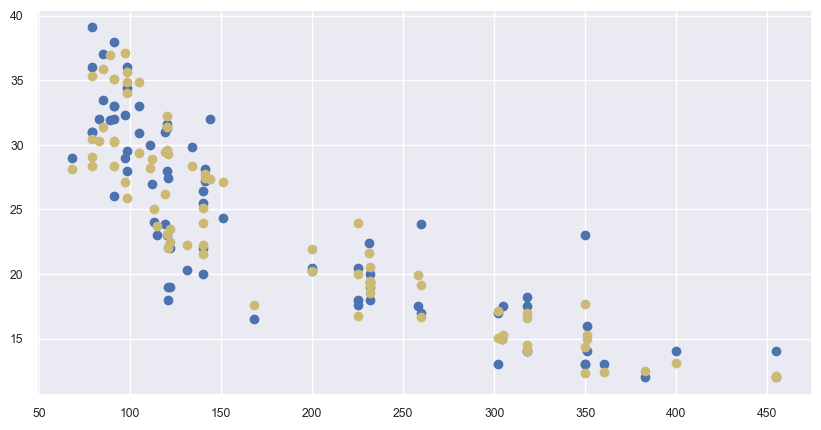

In [57]:
plt.clf()
plt.figure(figsize=(10,5))
plt.scatter(X_test['Displacement'], y_test, label='y_test')
plt.scatter(X_test['Displacement'], sy_preds, c='y', label='lr_preds')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()        